Quantile 0.25:
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4856
Model:                       QuantReg   Bandwidth:                      0.4319
Method:                 Least Squares   Sparsity:                        1.726
Date:                Wed, 08 Jan 2025   No. Observations:                  100
Time:                        10:34:29   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6796      0.131     12.811      0.000       1.419       1.940
x1             2.8995      0.227     12.769      0.000       2.449       3.350
Quantile 0.5:
                         QuantReg Regression Results                          
Dep. Variable:         

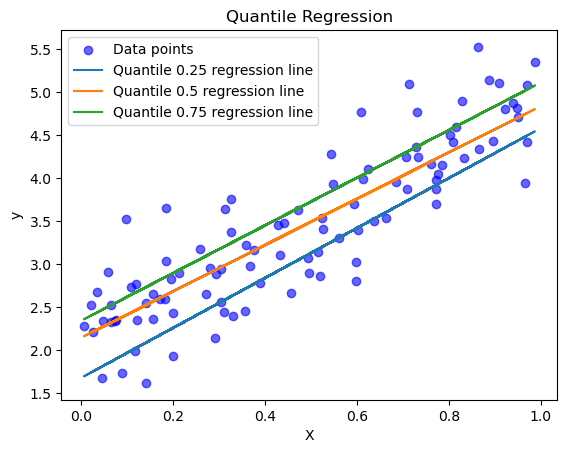

In [1]:
#Quantile regression 

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


np.random.seed(42)
X = np.random.rand(100)  
y = 2 + 3 * X + np.random.randn(100) * 0.5  


X = X.reshape(-1, 1)


X = sm.add_constant(X)  


quantiles = [0.25, 0.5, 0.75]  
models = []
for q in quantiles:
    model = sm.QuantReg(y, X).fit(q=q)
    models.append((q, model))
    print(f"Quantile {q}:")
    print(model.summary())


plt.scatter(X[:, 1], y, color="blue", alpha=0.6, label="Data points")


for q, model in models:
    line = model.params[0] + model.params[1] * X[:, 1]  
    plt.plot(X[:, 1], line, label=f"Quantile {q} regression line")


plt.xlabel("X")
plt.ylabel("y")
plt.title("Quantile Regression")
plt.legend()
plt.show()
